<a href="https://colab.research.google.com/github/akm2208/Aayushi-First-Files/blob/main/Aayushi_Mishra_Midterm_Question_2_Precipitation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Temperature Projections from CMIP6 Models

Install Libraries

In [3]:
!pip install cftime

In [4]:
!pip install  netCDF4

Import Libraries

In [5]:
import xarray as xr
import numpy as np
import pandas as pd
import netCDF4 as nc
import glob
import os
import cftime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Merge ..nc files

Open Dataset and Plot

<xarray.Dataset>
Dimensions:    (time: 60225, bnds: 2, lat: 64, lon: 128)
Coordinates:
  * time       (time) object 1850-01-01 12:00:00 ... 2014-12-31 12:00:00
  * lat        (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
  * lon        (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    pr         (time, lat, lon) float32 ...
Attributes: (12/53)
    CCCma_model_hash:            3dedf95315d603326fde4f5340dc0519d80d10c0
    CCCma_parent_runid:          rc3-pictrl
    CCCma_pycmor_hash:           33c30511acc319a98240633965a04ca99c26427e
    CCCma_runid:                 rc3.1-his01
    Conventions:                 CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:   1850:01:01:00
    ...                          ...
    tracking_id:                 hdl:21.14100/76d65850-67a9-4ab7-92d2-0e63ed9...

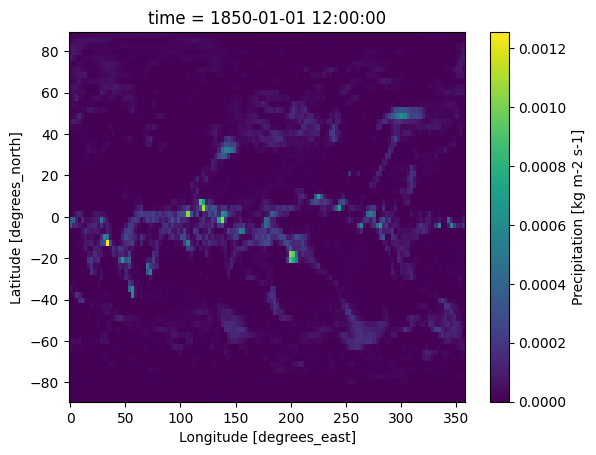

In [6]:
pr_Hist = "/content/drive/My Drive/CIVE5363_Midterm/pr_day_CanESM5_historical_r1i1p1f1_gn_18500101-20141231.nc"
pr_Hist= xr.open_dataset(pr_Hist, engine='netcdf4')


print(pr_Hist)
P = pr_Hist.sel(time = '1850-01-01')
P['pr'].plot()

In [ ]:
pr_Hist = xr.open_dataset("/content/drive/My Drive/CIVE5363_Midterm/pr_day_CanESM5_historical_r1i1p1f1_gn_18500101-20141231.nc")
# I want to convert the data from kg/m2/s to mm/day
pr_Hist['pr'] = pr_Hist['pr'] * 86400
# Once again I converted the longitude values to the correct scale
pr_Hist['lon'] = xr.where(pr_Hist['lon'] > 180, pr_Hist['lon'] - 360, pr_Hist['lon'])
pr_Hist = pr_Hist.sortby('lon')

In [ ]:
temp_Hist

<xarray.DataArray 'tas' (time: 60225, lat: 64, lon: 128)>
array([[[-21.206635  , -21.077774  , -20.951477  , ..., -21.728119  ,
         -21.546036  , -21.438004  ],
        [-12.924591  , -12.549408  , -12.155792  , ..., -14.203735  ,
         -13.789001  , -13.319946  ],
        [ -7.6190796 ,  -7.455414  ,  -7.1345825 , ...,  -7.623291  ,
          -7.680786  ,  -7.688507  ],
        ...,
        [-30.507294  , -30.920929  , -31.672821  , ..., -30.64267   ,
         -30.523956  , -30.439697  ],
        [-29.045181  , -29.208878  , -29.463074  , ..., -28.745956  ,
         -28.777649  , -28.88002   ],
        [-28.859985  , -28.949402  , -29.044922  , ..., -28.646149  ,
         -28.688095  , -28.782867  ]],

       [[-19.240005  , -18.978409  , -18.967041  , ..., -19.805176  ,
         -19.519104  , -19.455261  ],
        [-12.21283   , -11.814972  , -11.456177  , ..., -12.8414    ,
         -12.538422  , -12.622742  ],
        [ -7.176697  ,  -7.106842  ,  -6.7864685 , ...,  -7.2261353 ,
          -7.1793213 ,  -7.184784  ],
...
        [-22.381851  , -22.630386  , -22.734146  , ..., -20.99173   ,
         -21.611404  , -22.104904  ],
        [-23.521591  , -23.87204   , -24.170898  , ..., -22.513336  ,
         -22.786972  , -23.175156  ],
        [-26.152283  , -26.370255  , -26.575607  , ..., -25.309158  ,
         -25.544617  , -25.897797  ]],

       [[-20.338135  , -20.154404  , -19.922287  , ..., -20.933823  ,
         -20.728592  , -20.53482   ],
        [ -9.464569  ,  -9.020813  ,  -8.633575  , ..., -10.973328  ,
         -10.43222   ,  -9.929474  ],
        [ -1.6647034 ,  -1.6638794 ,  -1.6100464 , ...,  -1.8285828 ,
          -1.7188721 ,  -1.6668701 ],
        ...,
        [-22.215195  , -22.424377  , -22.728455  , ..., -22.139297  ,
         -22.06633   , -22.039276  ],
        [-22.581772  , -22.60353   , -22.639801  , ..., -23.05803   ,
         -22.93512   , -22.736084  ],
        [-24.333557  , -24.44072   , -24.260254  , ..., -23.8723    ,
         -23.922562  , -24.294342  ]]], dtype=float32)
Coordinates:
  * time     (time) object 1850-01-01 12:00:00 ... 2014-12-31 12:00:00
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 79.53 82.31 85.1 87.86
  * lon      (lon) float64 -177.2 -174.4 -171.6 -168.8 ... 174.4 177.2 180.0
    height   float64 2.0

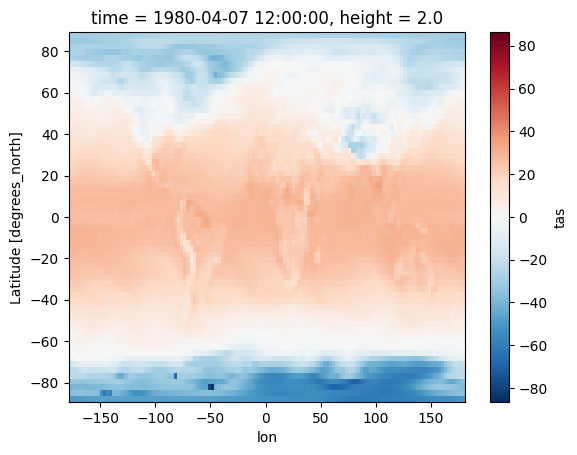

In [ ]:
T = temp_Hist.sel(time = '1980-04-07')
T.plot()


In [ ]:
!pip install geopandas

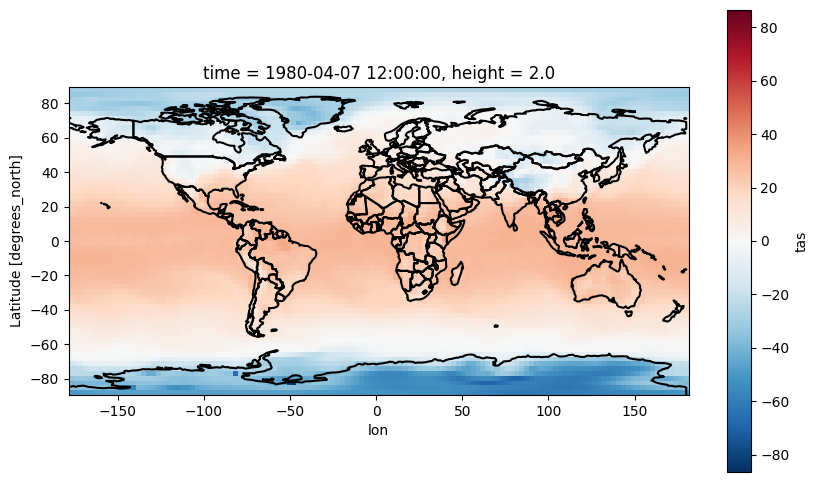

In [ ]:
import geopandas as gpd

# Load the shapefile for continent borders
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Select the data
T = temp_Hist.sel(time='1980-04-07')

# Plot the data
plt.figure(figsize=(10, 6))
T.plot()

# Plot continent borders
world.boundary.plot(ax=plt.gca(), linewidth=1.5, color='black')

# Show the plot
plt.show()


Analyzing Global Mean, Max,Trends

In [ ]:
mean_temp = temp_Hist.mean(dim='lat')
mean_temp = mean_temp.mean(dim = 'lon')
print(mean_temp)


<xarray.DataArray 'tas' (time: 60225)>
array([4.083939 , 4.0741253, 3.9351928, ..., 5.446696 , 5.4747186,
       5.290233 ], dtype=float32)
Coordinates:
  * time     (time) object 1850-01-01 12:00:00 ... 2014-12-31 12:00:00
    height   float64 2.0


In [ ]:
annual_mean  = mean_temp.groupby('time.year').mean('time')
print(annual_mean)

<xarray.DataArray 'tas' (year: 165)>
array([4.489126 , 4.3159256, 4.411185 , 4.498773 , 4.306536 , 4.294636 ,
       4.2533464, 4.292464 , 4.28768  , 4.367734 , 4.297199 , 4.3510847,
       4.2531395, 4.339657 , 4.368684 , 4.151714 , 4.48249  , 4.603051 ,
       4.3042827, 4.3908114, 4.536813 , 4.479868 , 4.3550687, 4.3602424,
       4.2994795, 4.425568 , 4.4307466, 4.4585953, 4.564088 , 4.544958 ,
       4.609826 , 4.469481 , 4.48528  , 4.513658 , 4.0780916, 4.180623 ,
       4.0369196, 4.148845 , 4.4655786, 4.334611 , 4.396852 , 4.27272  ,
       4.4208474, 4.3445435, 4.4185023, 4.5448427, 4.409442 , 4.5748715,
       4.50346  , 4.6050267, 4.543112 , 4.447216 , 4.46352  , 4.2716885,
       4.2599883, 4.2083607, 4.3716164, 4.472942 , 4.5454946, 4.42384  ,
       4.466917 , 4.4687552, 4.4484963, 4.278834 , 4.137996 , 4.322835 ,
       4.4139733, 4.6084666, 4.473518 , 4.508626 , 4.3548903, 4.5035706,
       4.4522514, 4.560074 , 4.6622243, 4.761482 , 4.567464 , 4.4639773,
       4.47466

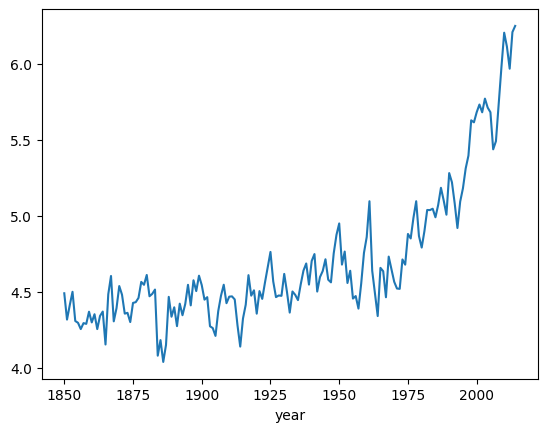

In [ ]:
df = annual_mean.to_dataframe()
df.tas.plot()
plt.show()

Slope 0.007705849780587445
Intercept 4.069320306154708


(2.5, 7.0)

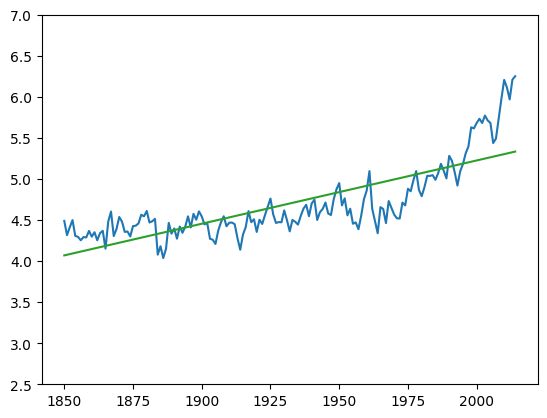

In [ ]:
import numpy as np
coefficients, residuals, _, _, _ = np.polyfit(range(len(df.index)),df,1,full=True)

print('Slope ' + str(coefficients[0][1]))
print('Intercept ' + str(coefficients[1][1]))


x = range(1850, 2015)
y = ([coefficients[0]*x + coefficients[1] for x in range(len(df))])
plt.plot(df.tas)
plt.plot(x,y)
plt.ylim(2.5,7)

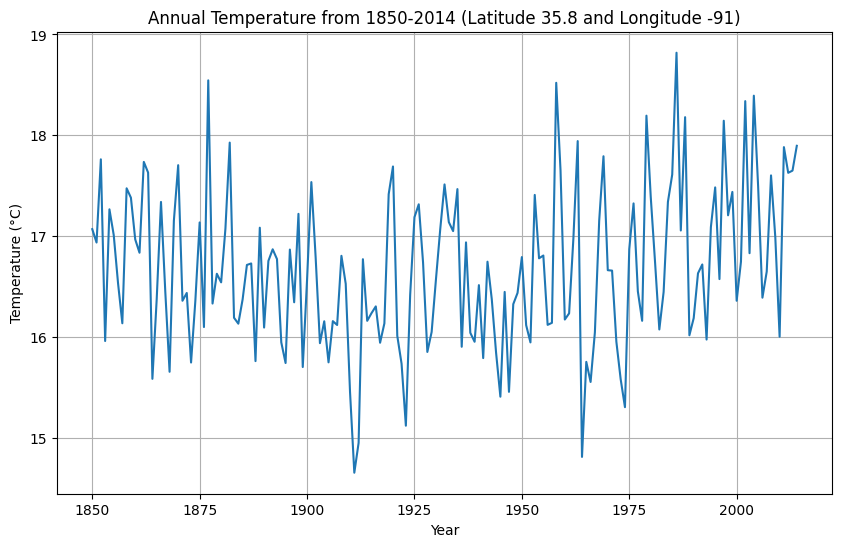

In [ ]:
# Question 2b(i)_Temperature
# I set the desiered latitude and longitudes
desired_lat = 35.8
desired_lon = -91

# To select the desired coordinates, I use .sel and the "nearest" method to ensure the closest values are selected
selected_location = temp_Hist.sel(lat=desired_lat, lon=desired_lon, method='nearest')

# I use groupby to calculate annual mean of the selected location
annual_mean = selected_location.groupby('time.year').mean('time')

# To plot the figure, I set the size to be 10,6 and set the title, axes names, and units
plt.figure(figsize=(10, 6))
annual_mean.plot()
plt.title('Annual Temperature from 1850-2014 (Latitude 35.8 and Longitude -91)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()